# Lista 1

### Zaimplementowane biblioteki

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Zadanie 1

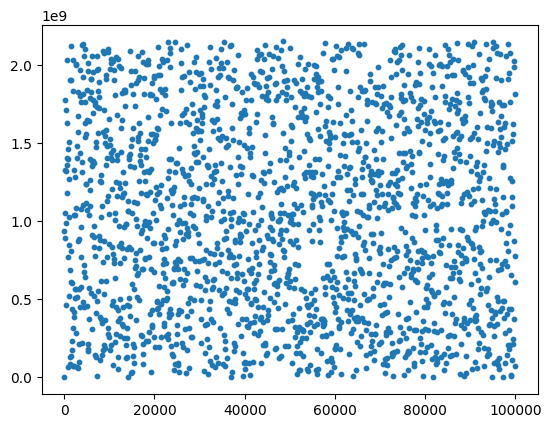

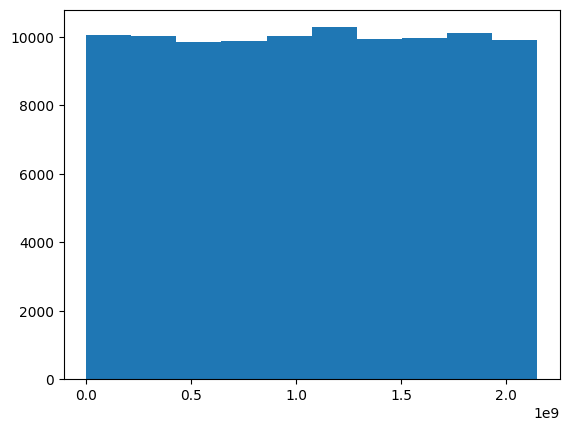

In [4]:
def lcg(n, alfa = 7**5, beta = 0, p = 2**31 - 1):
    results = [0]*n
    results[0] = 1
    for i in range(1, n):
        results[i] = (alfa*results[i-1] + beta)%p
    return results

x = np.arange(1, 100000)
y = lcg(100000)
plt.scatter(x[::50], y[::50], s = 10)
plt.show()
plt.hist(y)
plt.show()

### Zadanie 2

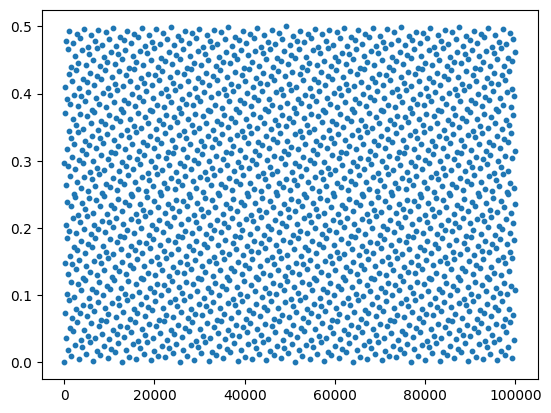

In [5]:
def van_der_corput(number ,base):
    result = 0
    den = 1
    while number:
        den *= base
        number, remainder = divmod(number, base)
        result += remainder/den
    return result

x = [i for i in range(0, 100000, 50)]
y = [van_der_corput(i, 2) for i in x]
plt.scatter(x, y, s = 10)
plt.show()

### Zadanie 3

In [6]:
def lcg_pi(n):
    in_circ = 0
    x = np.arange(0,1,1/n)
    y = [i/(2**31-1) for i in lcg(n)]
    for n in range(len(x)):
        if x[n]**2 + y[n]**2 < 1:
            in_circ += 1
    return 4 * in_circ/len(x)

print(f"N = 1000,\nPrzybliżenie pi:{lcg_pi(1000)},\nBłąd przybliżenia: {abs(np.pi - lcg_pi(1000))}")
print(f"N = 100000,\nPrzybliżenie pi:{lcg_pi(100000)}\nBłąd przybliżenia: {abs(np.pi - lcg_pi(100000))}")

N = 1000,
Przybliżenie pi:3.208,
Błąd przybliżenia: 0.06640734641020707
N = 100000,
Przybliżenie pi:3.14028
Błąd przybliżenia: 0.0013126535897929337


In [7]:
def halton_pi(n):
    in_circ = 0
    x = [van_der_corput(i, 5) for i in range(n)]
    y = [van_der_corput(i, 7) for i in range(n)]
    for n in range(len(x)):
        if x[n]**2 + y[n]**2 < 1:
            in_circ += 1
    return 4 * in_circ/len(x)

print(f"N = 1000,\nPrzybliżenie pi:{halton_pi(1000)},\nBłąd przybliżenia: {abs(np.pi - halton_pi(1000))}")
print(f"N = 100000,\nPrzybliżenie pi:{halton_pi(100000)}\nBłąd przybliżenia: {abs(np.pi - halton_pi(100000))}")

N = 1000,
Przybliżenie pi:3.144,
Błąd przybliżenia: 0.002407346410207012
N = 100000,
Przybliżenie pi:3.142
Błąd przybliżenia: 0.0004073464102067881


In [8]:
def uniform_pi(n):
    in_circ = 0
    x = np.arange(0,1,1/np.sqrt(n))
    y = np.arange(0,1,1/np.sqrt(n))
    for n in range(len(x)):
        if x[n]**2 + y[n]**2 < 1:
            in_circ += 1
    return 4 * in_circ/len(x)

print(f"N = 1000,\nPrzybliżenie pi:{uniform_pi(1000)},\nBłąd przybliżenia: {abs(np.pi - uniform_pi(1000))}")
print(f"N = 100000,\nPrzybliżenie pi:{uniform_pi(100000)}\nBłąd przybliżenia: {abs(np.pi - uniform_pi(100000))}")

N = 1000,
Przybliżenie pi:2.875,
Błąd przybliżenia: 0.2665926535897931
N = 100000,
Przybliżenie pi:2.826498422712934
Błąd przybliżenia: 0.31509423087685917


### Zadanie 4

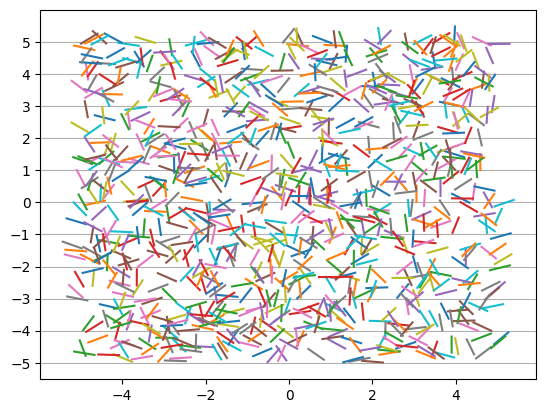

Przybliżenie pi: 3.3333333333333335


In [11]:
def buffons_needle(l, n):
    angle = np.random.uniform(0, np.pi, n)
    x1, y1 = (np.random.uniform(-5, 5, n), np.random.uniform(-5 ,5, n))
    x2, y2 = (x1 + l*np.cos(angle), y1 + l*np.sin(angle))
    crossings = [np.floor(val1) != np.floor(val2) for (val1, val2) in zip(y1,y2)]
    return zip(zip(x1,x2), zip(y1,y2)), sum(crossings)

def buffon_pi(n):
    points, crossings = buffons_needle(0.5, n)
    fig, ax = plt.subplots()
    major_ticks = np.arange(-5,6)
    for (xs,ys) in points:
        ax.plot(xs,ys)
    ax.set_yticks(major_ticks)
    ax.grid(which = 'major', axis='y')    
    plt.show()
    print(f"Przybliżenie pi: {(n*2*0.5)/crossings}")

buffon_pi(1000)